In [1]:
%matplotlib inline
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Raw data file
file_2014 = os.path.join('austin_crime.csv')
file_2015 = os.path.join('Annual_Crime_Dataset_2015.csv')
file_2016 = os.path.join('2016_Annual_Crime_Data.csv')

# Read crime report files and store into pandas data frame
crime_data_2014 = pd.read_csv(file_2014)
crime_data_2015 = pd.read_csv(file_2015)
crime_data_2016 = pd.read_csv(file_2016)

In [2]:
# Check original length of csv file rows
print(len(crime_data_2014))
print("-------------")
print(len(crime_data_2015))
print("-------------")
print(len(crime_data_2016))

159464
-------------
38573
-------------
37461


In [3]:
# Turn 2014 crime csv into dataframe and drop unneccessary columns
crime_data_2014 = pd.DataFrame(crime_data_2014)
crime_data_2014 = crime_data_2014.drop("latitude",axis=1)
crime_data_2014 = crime_data_2014.drop("location",axis=1)
crime_data_2014 = crime_data_2014.drop("longitude",axis=1)
crime_data_2014 = crime_data_2014.drop("census_tract",axis=1)
crime_data_2014 = crime_data_2014.drop("unique_key",axis=1)
crime_data_2014 = crime_data_2014.drop("zipcode",axis=1)
crime_data_2014 = crime_data_2014.drop("clearance_date",axis=1)
crime_data_2014 = crime_data_2014.drop("council_district_code",axis=1)
crime_data_2014 = crime_data_2014.drop("description",axis=1)
crime_data_2014 = crime_data_2014.drop("location_description",axis=1)
crime_data_2014 = crime_data_2014.drop("address",axis=1)

# Drop all rows containing no values
crime_data_2014 = crime_data_2014.dropna()

# Extract only 2014 data
crime_data_2014 = crime_data_2014.drop(crime_data_2014[crime_data_2014.year == 2015.0].index)

# Reorder columns
crime_data_2014 = crime_data_2014[['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate', 'year']]
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,2014-04-04 00:00:00,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,2014-04-04 00:00:00,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,2014-05-08 00:00:00,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,2014-12-18 00:00:00,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,2014-04-16 00:00:00,Not cleared,B,3117183.0,10103211.0,2014.0


In [4]:
# Edit timestamp column to show only month
crime_data_2014['timestamp'] = crime_data_2014['timestamp'].map(lambda x: str(x)[5:7])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,Not cleared,B,3117183.0,10103211.0,2014.0


In [5]:
# Edit clearance status to display only first character
crime_data_2014['clearance_status'] = crime_data_2014['clearance_status'].map(lambda x: str(x)[0:1])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,N,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,N,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,N,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,N,B,3117183.0,10103211.0,2014.0


In [6]:
crime_data_2014['primary_type_cleaned'] = crime_data_2014['primary_type']

In [7]:
import re
regex_pat = re.compile(r'^Theft:.*$', flags=re.IGNORECASE)
crime_data_2014["primary_type_cleaned"].replace(regex_pat, "Theft", inplace=True)

crime_data_2014["primary_type"] = crime_data_2014["primary_type_cleaned"]
crime_data_2014 = crime_data_2014.drop("primary_type_cleaned",axis=1)
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft,04,C,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,N,C,3118304.0,10072414.0,2014.0
14,Theft,05,N,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,N,C,3125976.0,10072207.0,2014.0
20,Theft,04,N,B,3117183.0,10103211.0,2014.0


In [8]:
crime_data_2014["district"].value_counts()

D     4701
E     4437
F     3974
A     3835
I     3745
B     3673
H     3387
G     2603
C     2531
AP     110
Name: district, dtype: int64

In [9]:
crime_data_2014["timestamp"].value_counts()

07    3000
08    2942
10    2915
05    2822
03    2761
09    2756
01    2750
06    2711
04    2667
12    2642
11    2602
02    2428
Name: timestamp, dtype: int64

In [10]:
crime_data_2014["primary_type"].value_counts()

Theft                                           28143
Auto Theft                                       2162
Aggravated Assault                               1827
Robbery                                           839
Homicide: Murder & Nonnegligent Manslaughter       25
Name: primary_type, dtype: int64

In [11]:
# Check length of set
len(crime_data_2014)

32996

In [12]:
# Turn 2015 and 2016 crime csv into dataframes and drop unneccessary columns
crime_data_2015 = pd.DataFrame(crime_data_2015)
crime_data_2016 = pd.DataFrame(crime_data_2016)

crime_data_2015 = crime_data_2015.drop("GO Primary Key",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Primary Key",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Highest Offense Desc",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Highest Offense Desc",axis=1)

crime_data_2015 = crime_data_2015.drop("Clearance Date",axis=1)
crime_data_2016 = crime_data_2016.drop("Clearance Date",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location Zip",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location Zip",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Census Tract",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Census Tract",axis=1)

crime_data_2015 = crime_data_2015.drop("Council District",axis=1)
crime_data_2016 = crime_data_2016.drop("Council District",axis=1)

# Drop all rows containing no values
crime_data_2015 = crime_data_2015.dropna()
crime_data_2016 = crime_data_2016.dropna()

In [13]:
# Rename columns for merge
crime_data_2015.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2015['year'] = 2015.0

In [14]:
# Edit timestamp column to show only month
for index, row in crime_data_2015.iterrows():
    split = row['timestamp']
    split = split.split('-')[1]
    crime_data_2015.set_value(index, 'timestamp', split)

C:\Users\shrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [15]:
crime_data_2015["primary_type"].value_counts()

Theft          26624
Burglary        4846
Auto Theft      1982
Agg Assault     1829
Robbery          826
Murder            18
Name: primary_type, dtype: int64

In [16]:
crime_data_2015 = crime_data_2015[crime_data_2015.district != "UK"]
crime_data_2015["district"].value_counts()

D     5226
E     4719
B     4691
F     4422
I     4118
A     3950
H     3508
C     2747
G     2577
AP     166
Name: district, dtype: int64

In [17]:
crime_data_2015["timestamp"].value_counts()

Jul    3311
Aug    3153
May    3129
Jun    3060
Apr    3019
Mar    3016
Dec    2973
Sep    2961
Jan    2949
Nov    2908
Oct    2887
Feb    2758
Name: timestamp, dtype: int64

In [18]:
# Rename columns for merge
crime_data_2016.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2016["year"] = 2016.0

In [19]:
# Edit timestamp column to show only month
for index, row in crime_data_2016.iterrows():
    split = row['timestamp']
    split = split.split('-')[1]
    crime_data_2016.set_value(index, 'timestamp', split)

C:\Users\shrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [20]:
crime_data_2016["timestamp"].value_counts()

Jan    3069
Mar    3064
Apr    3014
Oct    3007
Jun    2975
May    2926
Sep    2881
Dec    2876
Nov    2854
Aug    2830
Jul    2801
Feb    2676
Name: timestamp, dtype: int64

In [21]:
crime_data_2016 = crime_data_2016[crime_data_2016.district != "88"]
crime_data_2016 = crime_data_2016[crime_data_2016.district != "UK"]
crime_data_2016["district"].value_counts()

D     5083
E     4409
F     4172
B     4159
I     4065
H     3957
A     3793
C     2653
G     2518
AP     154
Name: district, dtype: int64

In [22]:
crime_data_2016["primary_type"].value_counts()

Theft          24907
Burglary        5036
Agg Assault     2090
Auto Theft      1989
Robbery          911
Murder            30
Name: primary_type, dtype: int64

In [23]:
# Check length of set
len(crime_data_2015)

36124

In [24]:
# Check length of set
len(crime_data_2016)

34963

In [25]:
#output_data_file_2014 = "clean_csvs/crime_2014.csv"
#output_data_file_2015 = "clean_csvs/crime_2015.csv"
#output_data_file_2016 = "clean_csvs/crime_2016.csv"

In [26]:
#crime_data_2014.to_csv(output_data_file_2014)
#crime_data_2015.to_csv(output_data_file_2015)
#crime_data_2016.to_csv(output_data_file_2016)

In [27]:
primary_type = ["Theft", "Auto Theft", "Aggravated Assault", "Robbery", "Homicide"]
counts = [27915,2390,1827,839,25]
colors = ["red","green","blue","orange","yellow"]
explode = (0.1,0.1,0.1,0.1,0.3)

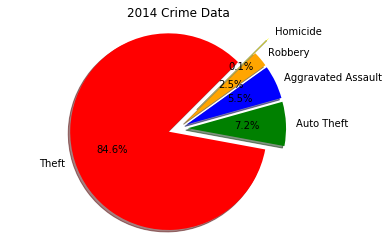

In [28]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2014 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [29]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [26624,4846,1982,1829,826,18]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

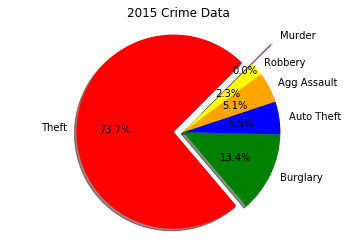

In [30]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2015 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [31]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [24911,5039,2092,1990,911,30]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

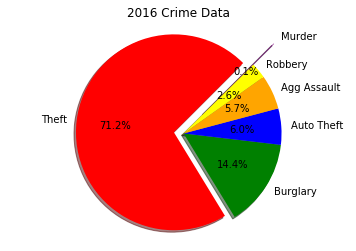

In [32]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2016 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [33]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [79450,9885,6362,3921,2576,48]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

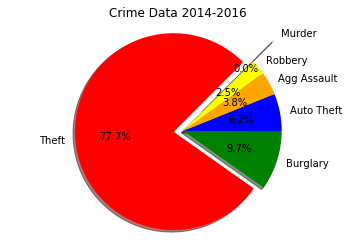

In [34]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Crime Data 2014-2016')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [35]:
#2014 crime rate by district 
x1 = district_D = crime_data_2014.loc[crime_data_2014["district"] =="D"]
x2 = district_E = crime_data_2014.loc[crime_data_2014["district"] =="E"]
x3 = district_F = crime_data_2014.loc[crime_data_2014["district"] =="F"]
x4 = district_A = crime_data_2014.loc[crime_data_2014["district"] =="A"]
x5 = district_I = crime_data_2014.loc[crime_data_2014["district"] =="I"]
x6 = district_B = crime_data_2014.loc[crime_data_2014["district"] =="B"]
x7 = district_H = crime_data_2014.loc[crime_data_2014["district"] =="H"]
x8 = district_G = crime_data_2014.loc[crime_data_2014["district"] =="G"]
x9 = district_C = crime_data_2014.loc[crime_data_2014["district"] =="C"]
x10 = district_AP = crime_data_2014.loc[crime_data_2014["district"] =="AP"]

Text(0,0.5,'CRIME COUNT')

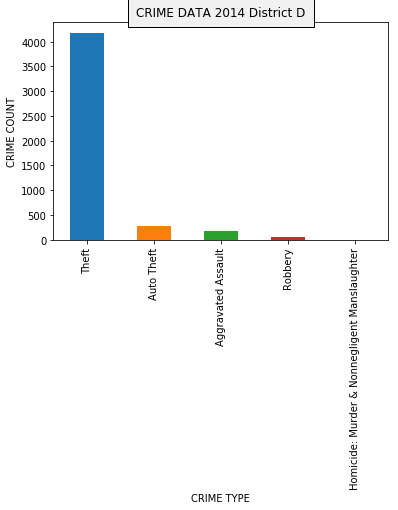

In [144]:
#2014 crime rate by district "D"
x1 = district_D = crime_data_2014.loc[crime_data_2014["district"] =="D"]
primary_value_counts = x1["primary_type"].value_counts()
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District D',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

Text(0,0.5,'CRIME COUNT')

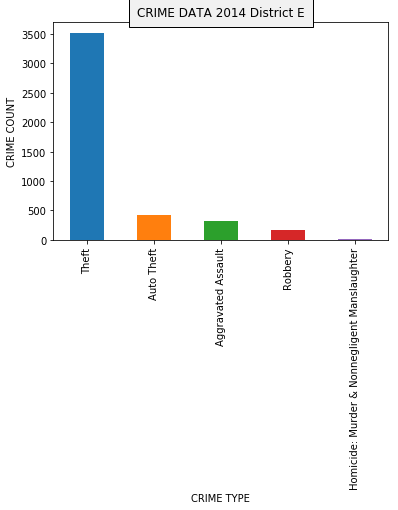

In [148]:
#2014 crime rate by district "E"
x2 = district_E = crime_data_2014.loc[crime_data_2014["district"] =="E"]
primary_value_counts = x2["primary_type"].value_counts()
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District E',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

Text(0,0.5,'CRIME COUNT')

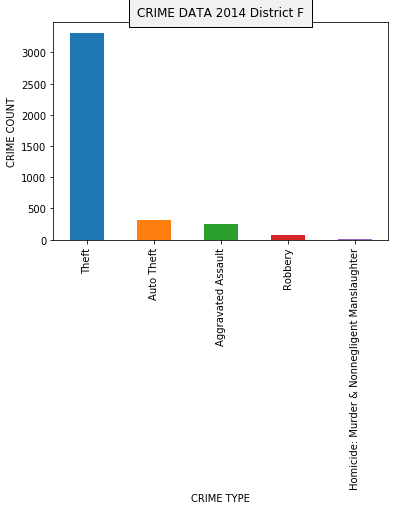

In [149]:
#2014 crime rate by district "F"
x3 = district_F = crime_data_2014.loc[crime_data_2014["district"] =="F"]
primary_value_counts = x3["primary_type"].value_counts()
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District F',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [42]:
#2014 crime rate by district "A"
x4 = district_A = crime_data_2014.loc[crime_data_2014["district"] =="A"]
primary_value_counts = x4["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

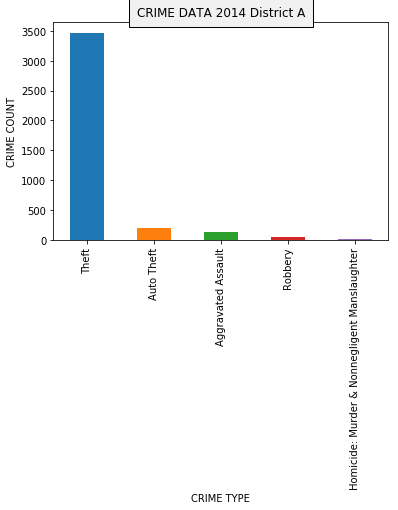

In [43]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District A',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [44]:
#2014 crime rate by district "I"
x5 = district_I = crime_data_2014.loc[crime_data_2014["district"] =="I"]
primary_value_counts = x5["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

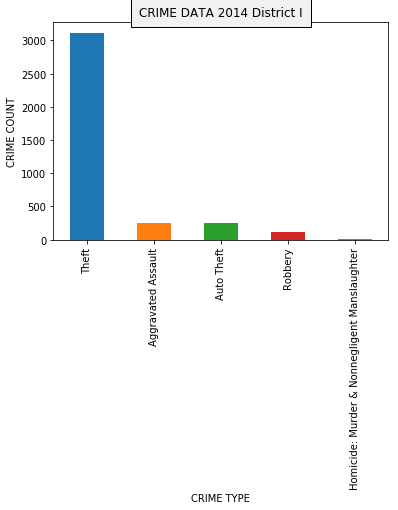

In [45]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District I',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [46]:
#2014 crime rate by district "B"
x6 = district_B = crime_data_2014.loc[crime_data_2014["district"] =="B"]
primary_value_counts = x6["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

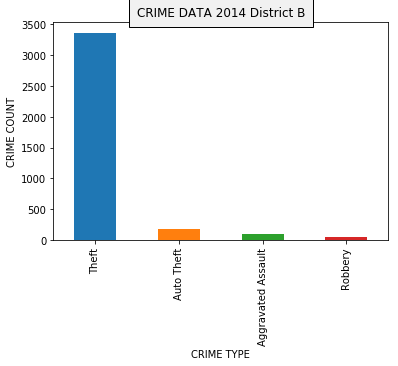

In [47]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District B',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [48]:
#2014 crime rate by district "H"
x7 = district_H = crime_data_2014.loc[crime_data_2014["district"] =="H"]
primary_value_counts = x7["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

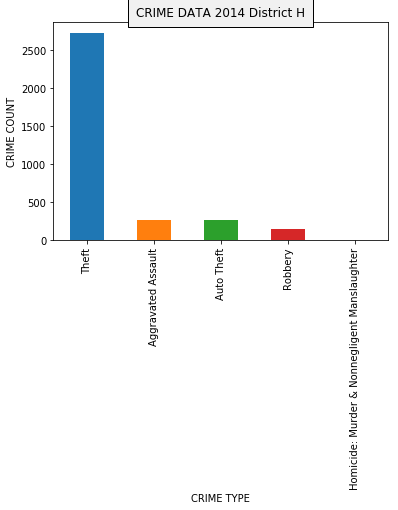

In [49]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District H',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [50]:
#2014 crime rate by district "G"
x8 = district_G = crime_data_2014.loc[crime_data_2014["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

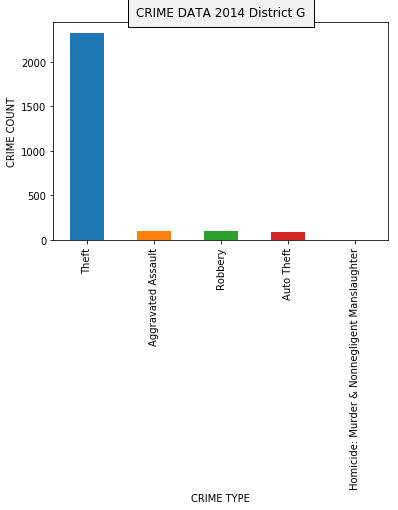

In [51]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District G',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [52]:
#2014 crime rate by district "C"
x9 = district_C = crime_data_2014.loc[crime_data_2014["district"] =="C"]
primary_value_counts = x9["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

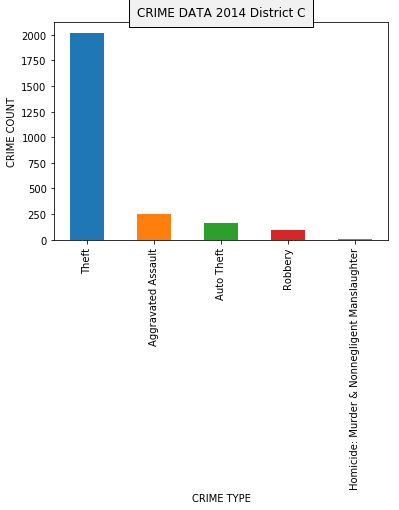

In [53]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District C',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [54]:
#2014 crime rate by district "AP"
x10 = district_AP = crime_data_2014.loc[crime_data_2014["district"] =="AP"]
primary_value_counts = x10["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

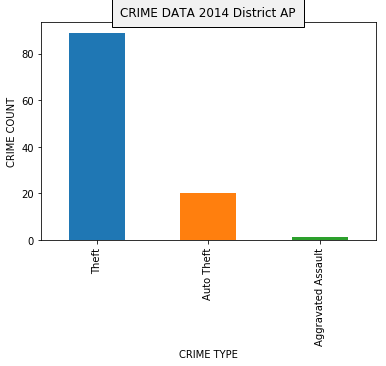

In [55]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2014 District AP',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [56]:
#2015 crime rate by district 
x1 = district_D = crime_data_2015.loc[crime_data_2015["district"] =="D"]
x2 = district_E = crime_data_2015.loc[crime_data_2015["district"] =="E"]
x3 = district_F = crime_data_2015.loc[crime_data_2015["district"] =="F"]
x4 = district_A = crime_data_2015.loc[crime_data_2015["district"] =="A"]
x5 = district_I = crime_data_2015.loc[crime_data_2015["district"] =="I"]
x6 = district_B = crime_data_2015.loc[crime_data_2015["district"] =="B"]
x7 = district_H = crime_data_2015.loc[crime_data_2015["district"] =="H"]
x8 = district_G = crime_data_2015.loc[crime_data_2015["district"] =="G"]
x9 = district_C = crime_data_2015.loc[crime_data_2015["district"] =="C"]
x10 = district_AP = crime_data_2015.loc[crime_data_2015["district"] =="AP"]

In [57]:
#2015 crime rate by district "D"
x1 = district_D = crime_data_2015.loc[crime_data_2015["district"] =="D"]
primary_value_counts = x1["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

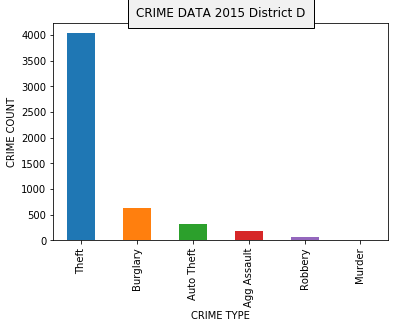

In [58]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District D',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [59]:
#2015 crime rate by district "E"
x2 = district_E = crime_data_2015.loc[crime_data_2015["district"] =="E"]
primary_value_counts = x2["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

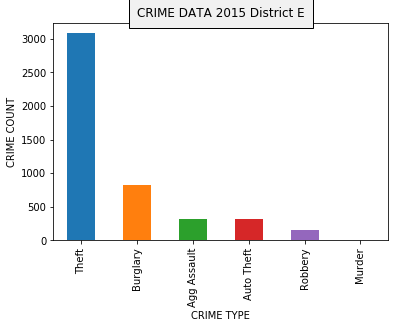

In [60]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District E',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [61]:
#2015 crime rate by district "F"
x3 = district_F = crime_data_2015.loc[crime_data_2015["district"] =="F"]
primary_value_counts = x3["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

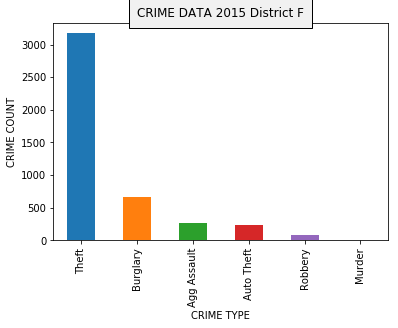

In [62]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District F',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [63]:
#2015 crime rate by district "A"
x4 = district_A = crime_data_2015.loc[crime_data_2015["district"] =="A"]
primary_value_counts = x4["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

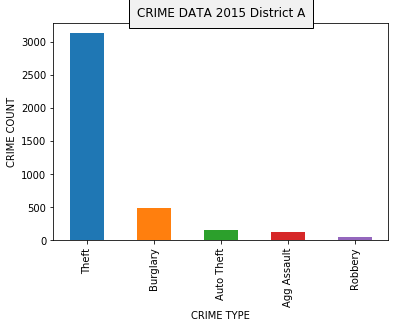

In [64]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District A',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [65]:
#2014 crime rate by district "I"
x5 = district_I = crime_data_2015.loc[crime_data_2015["district"] =="I"]
primary_value_counts = x5["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

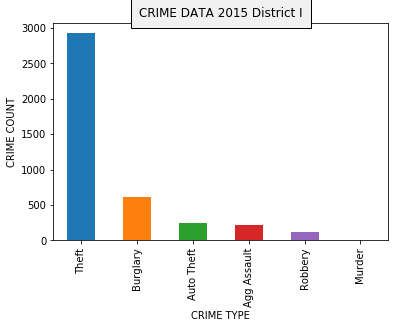

In [66]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District I',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [67]:
x6 = district_B = crime_data_2015.loc[crime_data_2015["district"] =="B"]
primary_value_counts = x6["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

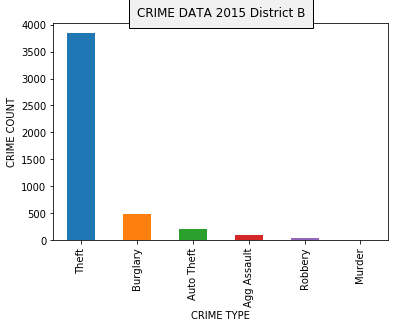

In [68]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District B',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [69]:
x7 = district_H= crime_data_2015.loc[crime_data_2015["district"] =="H"]
primary_value_counts = x7["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

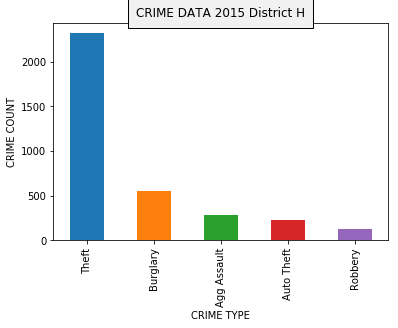

In [70]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District H',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [71]:
x8 = district_G = crime_data_2015.loc[crime_data_2015["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

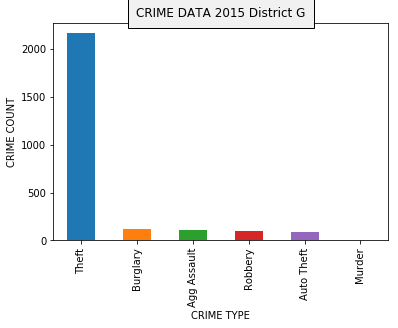

In [72]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District G',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [73]:
x9 = district_C = crime_data_2015.loc[crime_data_2015["district"] =="C"]
primary_value_counts = x9["primary_type"].value_counts()

Text(0,0.5,'CRIME COUNT')

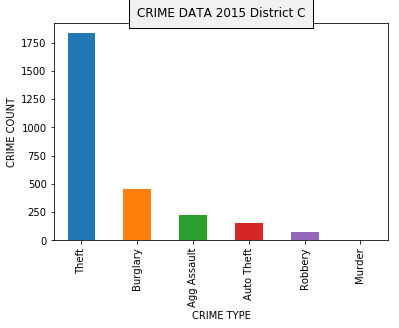

In [74]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District C',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("CRIME TYPE")
plt.ylabel("CRIME COUNT")

In [75]:
x10 = district_AP = crime_data_2015.loc[crime_data_2015["district"] =="AP"]
primary_value_counts = x10["primary_type"].value_counts()

Text(0,0.5,'Crime count')

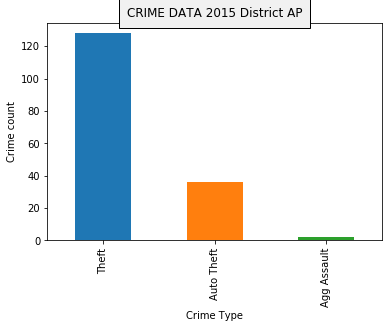

In [76]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2015 District AP',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [77]:
x1 = district_D = crime_data_2016.loc[crime_data_2016["district"] =="D"]
x2 = district_E = crime_data_2016.loc[crime_data_2016["district"] =="E"]
x3 = district_F = crime_data_2016.loc[crime_data_2016["district"] =="F"]
x4 = district_A = crime_data_2016.loc[crime_data_2016["district"] =="A"]
x5 = district_I = crime_data_2016.loc[crime_data_2016["district"] =="I"]
x6 = district_B = crime_data_2016.loc[crime_data_2016["district"] =="B"]
x7 = district_H = crime_data_2016.loc[crime_data_2016["district"] =="H"]
x8 = district_G = crime_data_2016.loc[crime_data_2016["district"] =="G"]
x9 = district_C = crime_data_2016.loc[crime_data_2016["district"] =="C"]
x10 = district_AP = crime_data_2016.loc[crime_data_2016["district"] =="AP"]

In [78]:
#2016 crime rate by district "D"
x1 = district_D = crime_data_2016.loc[crime_data_2016["district"] =="D"]
primary_value_counts = x1["primary_type"].value_counts()

Text(0,0.5,'Crime count')

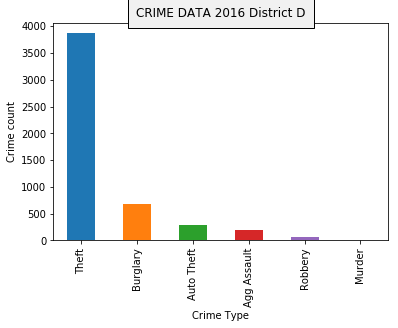

In [79]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District D',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [80]:
#2016 crime rate by district "E"
x2 = district_E = crime_data_2016.loc[crime_data_2016["district"] =="E"]
primary_value_counts = x2["primary_type"].value_counts()

Text(0,0.5,'Crime count')

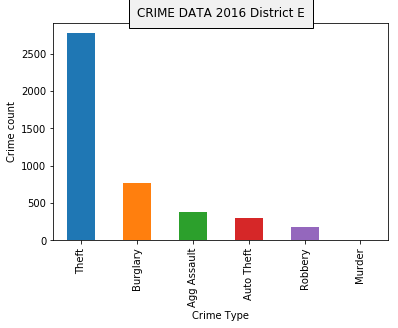

In [81]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District E',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [82]:
#2016 crime rate by district "F"
x3 = district_F = crime_data_2016.loc[crime_data_2016["district"] =="F"]
primary_value_counts = x3["primary_type"].value_counts()

Text(0,0.5,'Crime count')

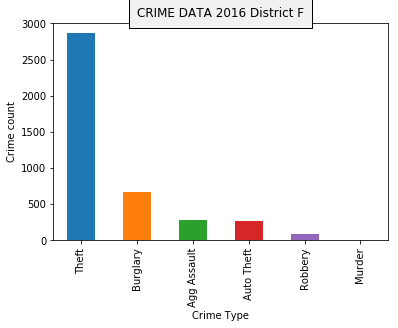

In [83]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District F',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [84]:
#2016 crime rate by district "A"
x4 = district_A = crime_data_2016.loc[crime_data_2016["district"] =="A"]
primary_value_counts = x4["primary_type"].value_counts()

Text(0,0.5,'Crime count')

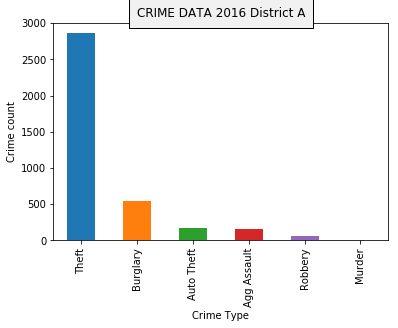

In [85]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District A',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [86]:
#2016 crime rate by district "I"
x5 = district_I = crime_data_2016.loc[crime_data_2016["district"] =="I"]
primary_value_counts = x5["primary_type"].value_counts()

Text(0,0.5,'Crime count')

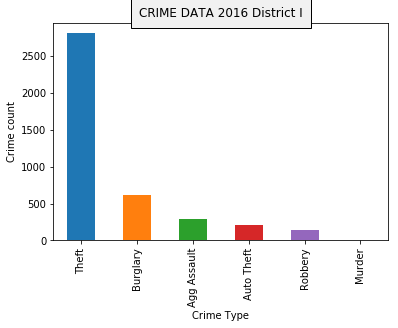

In [87]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District I',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [88]:
#2016 crime rate by district "B"
x6 = district_B = crime_data_2016.loc[crime_data_2016["district"] =="B"]
primary_value_counts = x6["primary_type"].value_counts()

Text(0,0.5,'Crime count')

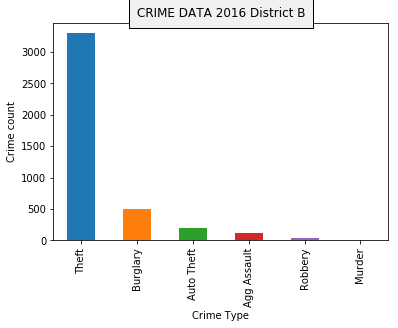

In [89]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District B',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [90]:
#2016 crime rate by district "H"
x7 = district_H = crime_data_2016.loc[crime_data_2016["district"] =="H"]
primary_value_counts = x7["primary_type"].value_counts()

Text(0,0.5,'Crime count')

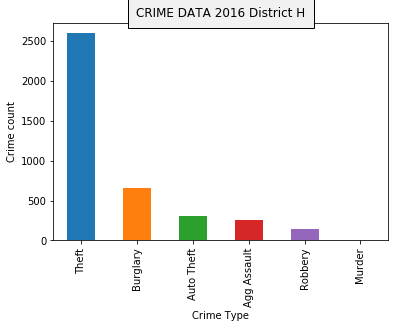

In [91]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District H',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [92]:
#2016 crime rate by district "G"
x8 = district_G = crime_data_2016.loc[crime_data_2016["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'Crime count')

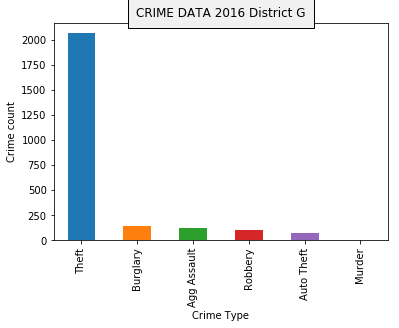

In [93]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District G',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [94]:
x9 = district_C = crime_data_2016.loc[crime_data_2016["district"] =="C"]
primary_value_counts = x9["primary_type"].value_counts()

Text(0,0.5,'Crime count')

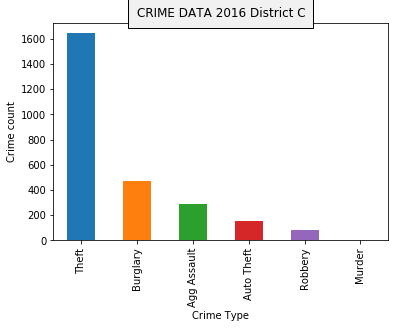

In [95]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District C',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [96]:
x10 = district_AP = crime_data_2016.loc[crime_data_2016["district"] =="AP"]
primary_value_counts = x10["primary_type"].value_counts()

Text(0,0.5,'Crime count')

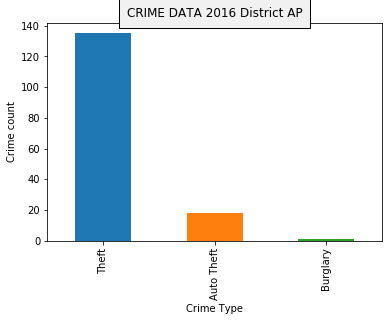

In [97]:
primary_value_counts.plot(kind="bar")
plt.title('CRIME DATA 2016 District AP',bbox={'facecolor':'15', 'pad':8})
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [98]:
crime_data_2014["primary_type"].value_counts()

Theft                                           28143
Auto Theft                                       2162
Aggravated Assault                               1827
Robbery                                           839
Homicide: Murder & Nonnegligent Manslaughter       25
Name: primary_type, dtype: int64

In [99]:
crime_data_2015["primary_type"].value_counts()

Theft          26624
Burglary        4846
Auto Theft      1982
Agg Assault     1828
Robbery          826
Murder            18
Name: primary_type, dtype: int64

In [100]:
crime_data_2016["primary_type"].value_counts()

Theft          24907
Burglary        5036
Agg Assault     2090
Auto Theft      1989
Robbery          911
Murder            30
Name: primary_type, dtype: int64

In [101]:
year_2014 = crime_data_2014["primary_type"].value_counts()
year_2015 = crime_data_2015["primary_type"].value_counts()
year_2016 = crime_data_2016["primary_type"].value_counts()

year_2014 = list(year_2014.values)
year_2015 = list(year_2015.values)
year_2016 = list(year_2016.values)

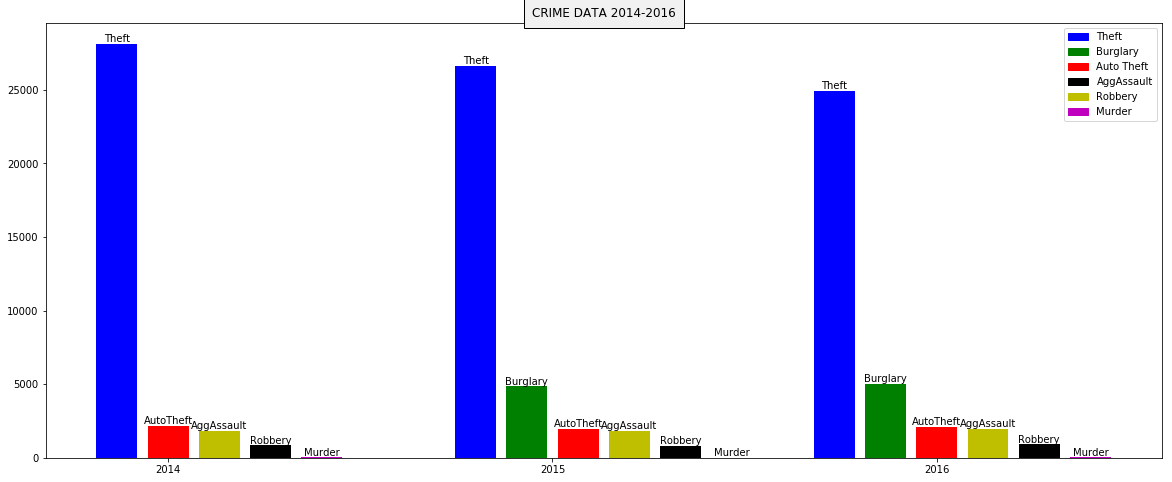

In [102]:
import matplotlib.patches as mpatches
x = [crime_data_2014["primary_type"].value_counts(),
     crime_data_2015["primary_type"].value_counts(),crime_data_2016["primary_type"].value_counts()]
y = [30000, 20000, 10000, 5000, 500, 100]
z=[1,2,3,3,3, 3]
k=[11,12,13]


fig = plt.figure(figsize = (20,8))
ax = plt.subplot(111)
ax.bar(np.arange(5)-7, year_2014,color=['b','r','y','k','m'],align='center', label=["Theft","AutoTheft","AggAssault","Robbery","Murder"])
ax.bar(np.arange(6), year_2015,color=['b','g','r','y','k','m'],align='center')
ax.bar(np.arange(6)+7, year_2016,color=['b','g','r','y','k','m'],align='center')
ax.set_xticks([-6,1.5,9])
ax.set_xticklabels(["2014","2015", "2016"])

rects = ax.patches

# Make some labels.
labels = ["Theft","AutoTheft","AggAssault","Robbery","Murder","Theft","Burglary","AutoTheft","AggAssault","Robbery","Murder","Theft","Burglary","AutoTheft","AggAssault","Robbery","Murder"]

for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
           ha='center', va='bottom')
theft_patch = mpatches.Patch(color='b', label='Theft')
Burglary_patch = mpatches.Patch(color='g', label='Burglary')
auto_theft_patch = mpatches.Patch(color='r', label='Auto Theft')
AggAssault_patch = mpatches.Patch(color='k', label='AggAssault')
Robbery_patch = mpatches.Patch(color='y', label='Robbery')
Murder_patch = mpatches.Patch(color='m', label='Murder')
plt.title('CRIME DATA 2014-2016',bbox={'facecolor':'15', 'pad':8})

ax.legend(handles=[theft_patch, Burglary_patch, auto_theft_patch,AggAssault_patch,Robbery_patch,Murder_patch ]) 
plt.show()

In [142]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_loc=['2014','2015','2016']
incident_type_2014 = ['Homicide','Robbery','Aggravated Assault','Auto\nTheft','Burglary','Theft']
slimmed_data = crime_data_2016[['primary_type', 'timestamp']]
test = pd.get_dummies(slimmed_data, columns=['primary_type'])
grouped = test.groupby('timestamp').sum()
Austin_Population = 931,830
Austin_Population = 931830 / 100000
crimes_popl_2016 = (grouped /Austin_Population)
crimes_popl_2016.reset_index()
crimes_popl_2016[['primary_type_Agg Assault','primary_type_Auto Theft']].sum()
crimes_popl_2016['primary_type_Auto Theft'].sum()
crimes_popl_2016['primary_type_Burglary'].sum()
crimes_popl_2016['primary_type_Homicide'].sum()
crimes_popl_2016['primary_type_Robbery'].sum()
crimes_popl_2016['primary_type_Theft'].sum()
# values_2014 = [25,839,1827,2162,0,28143]
values_2015 = [18,826,1829,1982,4846,26624]
values_2016 = [30,911,1990,2092,5039,24911]
p1_2014 = plt.bar(x_loc[0],values_2014[0], width=0.3, color='orange')
p2_2014 = plt.bar(x_loc[0], values_2014[1], bottom=values_2014[0], width=0.3, color='lightblue')
p3_2014 = plt.bar(x_loc[0], values_2014[2], bottom=values_2014[1], width=0.3, color='red')
p4_2014 = plt.bar(x_loc[0], values_2014[3], bottom=values_2014[2], width=0.3, color='lightgreen')
p5_2014 = plt.bar(x_loc[0], values_2014[4], bottom=values_2014[3], width=0.3, color='purple')
p6_2014 = plt.bar(x_loc[0], values_2014[5], bottom=values_2014[4], width=0.3, color='blue')
p1_2015 = plt.bar(x_loc[1],values_2015[0], width=0.3, color='orange')
p2_2015 = plt.bar(x_loc[1], values_2015[1], bottom=values_2015[0], width=0.3, color='lightblue')
p3_2015 = plt.bar(x_loc[1], values_2015[2], bottom=values_2015[1], width=0.3, color='red')
p4_2015 = plt.bar(x_loc[1], values_2015[3], bottom=values_2015[2], width=0.3, color='lightgreen')
p5_2015 = plt.bar(x_loc[1], values_2015[4], bottom=values_2015[3], width=0.3, color='purple')
p6_2015 = plt.bar(x_loc[1], values_2015[5], bottom=values_2015[4], width=0.3, color='blue')
p1_2016 = plt.bar(x_loc[2],values_2016[0], width=0.3, color='orange')
p2_2016 = plt.bar(x_loc[2], values_2016[1], bottom=values_2016[0], width=0.3, color='lightblue')
p3_2016 = plt.bar(x_loc[2], values_2016[2], bottom=values_2016[1], width=0.3, color='red')
p4_2016 = plt.bar(x_loc[2], values_2016[3], bottom=values_2016[2], width=0.3, color='lightgreen')
p5_2016 = plt.bar(x_loc[2], values_2016[4], bottom=values_2016[3], width=0.3, color='purple')
p6_2016 = plt.bar(x_loc[2], values_2016[5], bottom=values_2016[4], width=0.3, color='blue')
plt.xticks(x_loc)
plt.ylabel('CRIME RATE')
plt.title('CRIME RATE FROM 2014-2016 IN CITY OF AUSTIN')
plt.legend(incident_type_2014, bbox_to_anchor=(1.1,0.5), loc="right",bbox_transform=plt.gcf().transFigure)
plt.show()

KeyError: 'primary_type_Homicide'